# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Dwi NurCahyo Purbonegoro
- **Email:** dwicahyo141@gmail.com
- **ID Dicoding:** dwi_nurcahyo

## Menentukan Pertanyaan Bisnis

1.   Bagaimana pola penggunaan sepeda berdasarkan musim?
2.   Apakah kondisi cuaca mempengaruhi peningkatan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [94]:
day_df = pd.read_csv("https://raw.githubusercontent.com/DcCode46/dicoding/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/DcCode46/dicoding/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv berisi data harian dengan 731 entri.
- hour.csv berisi data per jam dengan 17.379 entri.
- Kolom yang tersedia mencakup informasi tentang musim, hari kerja, cuaca, suhu, kelembaban, kecepatan angin, serta jumlah penyewa (baik casual maupun registered).
- hr (jam) hanya ada di hour.csv, sesuai dengan format data per jam.

### Assessing Data

#### **Menilai tabel day_df**

In [96]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
print("\nPreview Dataset day_df: ")
print(day_df.head())


Preview Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [98]:
print("\nCek Data Hilang dalam Dataset day_df: ")
print(day_df.isna().sum())


Cek Data Hilang dalam Dataset day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Menilai tabel hour_df**

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [100]:
print("\nPreview Dataset hour_df: ")
print(hour_df.head())


Preview Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [101]:
print("\nCek Data Hilang dalam Dataset hour_df: ")
print(hour_df.isna().sum())


Cek Data Hilang dalam Dataset hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada data yang hilang dalam kedua dataset (day.csv dan hour.csv).
Kolom dteday masih dalam format object (string), sebaiknya diubah menjadi format datetime.
- Semua kolom lainnya memiliki tipe data yang sesuai dengan nilai yang disimpan (integer dan float).

### Cleaning Data

#### Membersihkan day_df

##### Mengecek Duplicate data

In [102]:
print("\nJumlah Data Duplikat dalam Dataset day_df: ", day_df.duplicated().sum())


Jumlah Data Duplikat dalam Dataset day_df:  0


##### Missing Value

In [103]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Membersihkan hour_df

##### Duplicate data

In [104]:
print("\nJumlah Data Duplikat dalam Dataset hour_df: ", hour_df.duplicated().sum())


Jumlah Data Duplikat dalam Dataset hour_df:  0


##### Missing value

In [105]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Kedua data set bersih dan tidak ada yang perlu di cleaning.

## Exploratory Data Analysis (EDA)

In [106]:
print("\nStatistik deskriptif day_df: ") # menampilkan dataframe day_df
day_df.describe(include="all")


Statistik deskriptif day_df: 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [107]:
season_stats = day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).rename(index={1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

season_stats

cnt                                      
            sum         mean   max   min          std
season                                               
Spring   471348  2604.132597  7836   431  1399.942119
Summer   918589  4992.331522  8362   795  1695.977235
Fall    1061129  5644.303191  8714  1115  1459.800381
Winter   841613  4728.162921  8555    22  1699.615261

In [108]:
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [109]:
day_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1


In [110]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
478,479,2012-04-23,2,1,4,0,1,1,2,0.321667,0.301125,0.766667,0.303496,195,3019,3214
74,75,2011-03-16,1,0,3,0,3,1,2,0.365217,0.366930,0.776522,0.203117,321,1871,2192
47,48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234


In [111]:
print("\nStatistik deskriptif hour_df: ") # menampilkan dataframe hour_df
hour_df.describe(include="all")


Statistik deskriptif hour_df: 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [112]:
# Menganalisis hubungan antara kondisi cuaca dan jumlah penyewaan sepeda
weather_stats = hour_df.groupby("weathersit").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).rename(index={1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Salju"})

weather_stats


cnt                                 
                sum        mean  max min         std
weathersit                                          
Cerah       2338173  204.869272  977   1  189.487773
Mendung      795952  175.165493  957   1  165.431589
Hujan        158331  111.579281  891   1  133.781045
Salju           223   74.333333  164  23   77.925178

In [113]:
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [114]:
hour_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1
4,1


In [115]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14649,14650,2012-09-07,3,1,9,14,0,5,1,1,0.80,0.7727,0.59,0.2537,66,187,253
5333,5334,2011-08-15,3,0,8,3,0,1,1,1,0.60,0.5606,0.83,0.1940,1,6,7
1677,1678,2011-03-15,1,0,3,12,0,2,1,2,0.36,0.3485,0.50,0.2239,32,70,102
278,279,2011-01-13,1,0,1,1,0,4,1,1,0.14,0.1212,0.50,0.2836,0,2,2
6760,6761,2011-10-14,4,0,10,6,0,5,1,3,0.56,0.5303,0.88,0.1940,4,90,94


In [116]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah penyewaan sepeda
season_usage = day_df.groupby("season")["cnt"].mean().reset_index()

# Mengganti angka musim dengan label nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_usage["season"] = season_usage["season"].map(season_mapping)

# Menampilkan hasil agregasi
season_usage

,season,cnt
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


In [117]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata jumlah penyewaan sepeda
weather_usage = day_df.groupby("weathersit")["cnt"].mean().reset_index()

# Mengganti angka kondisi cuaca dengan label deskriptif
weather_mapping = {1: "cerah", 2: "mendung", 3: "hujan"}
weather_usage["weathersit"] = weather_usage["weathersit"].map(weather_mapping)

# Menampilkan hasil agregasi
weather_usage

,weathersit,cnt
0,cerah,4876.786177
1,mendung,4035.862348
2,hujan,1803.285714


In [118]:
# 1. Jumlah penyewaan sepeda berdasarkan bulan
month_usage = day_df.groupby("mnth")["cnt"].sum().reset_index()

# Mengganti angka bulan dengan nama bulan
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
month_usage["mnth"] = month_usage["mnth"].map(month_mapping)

month_usage

,mnth,cnt
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


In [119]:
# 2. Jumlah penyewaan sepeda berdasarkan hari dalam seminggu
weekday_usage = day_df.groupby("weekday")["cnt"].sum().reset_index()

# Mengganti angka hari dengan nama hari
weekday_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}
weekday_usage["weekday"] = weekday_usage["weekday"].map(weekday_mapping)

weekday_usage

,weekday,cnt
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


In [120]:
# 3. Jumlah penyewaan sepeda berdasarkan jam (dari dataset hourly)
hourly_usage = hour_df.groupby("hr")["cnt"].sum().reset_index().sort_values("hr")

hourly_usage

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [121]:
# 4. Jumlah penyewaan sepeda berdasarkan kombinasi musim dan kondisi cuaca
season_weather_usage = (
    day_df.groupby(["season", "weathersit"])["cnt"]
    .sum()
    .reset_index()
    .sort_values(["season", "weathersit"])
)

# Mapping label musim dan cuaca
season_weather_usage["season"] = season_weather_usage["season"].map(season_mapping)
season_weather_usage["weathersit"] = season_weather_usage["weathersit"].map(weather_mapping)

season_weather_usage

,season,weathersit,cnt
0,Spring,cerah,312036
1,Spring,mendung,155573
2,Spring,hujan,3739
3,Summer,cerah,626986
4,Summer,mendung,288096
5,Summer,hujan,3507
6,Fall,cerah,799443
7,Fall,mendung,250679
8,Fall,hujan,11007
9,Winter,cerah,519487


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-122-2e85e7ab64c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')


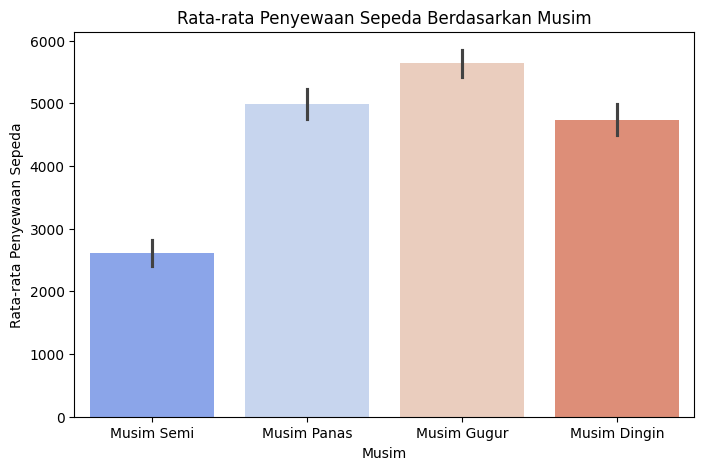

In [122]:
def plot_rentals_by_season(df):
    plt.figure(figsize=(8,5))
    sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')
    plt.xlabel('Musim')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
    plt.show()

plot_rentals_by_season(day_df)

### Pertanyaan 2:

<ipython-input-123-b5c2b7c283bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, palette='coolwarm')


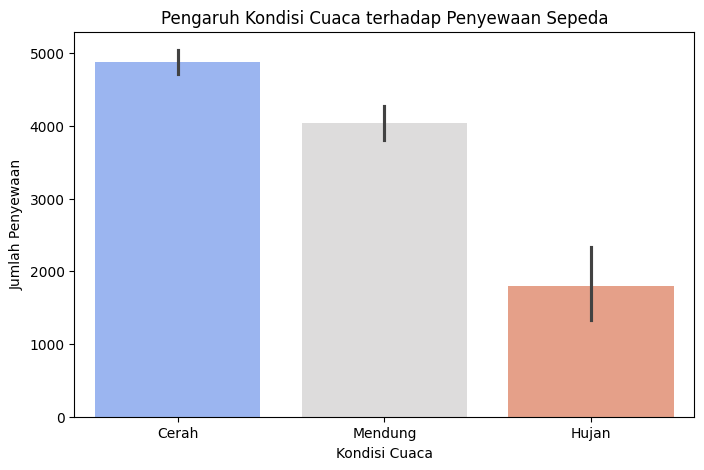

In [123]:
def plot_weather_effect(df):
    plt.figure(figsize=(8,5))
    sns.barplot(x='weathersit', y='cnt', data=df, palette='coolwarm')
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
    plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan'])
    plt.show()

plot_weather_effect(day_df)

## Conclusion

Pola Penyewaan Sepeda Musiman
- Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin.
- Musim semi memiliki penyewaan terendah, mungkin karena cuaca yang tidak stabil dengan suhu yang lebih rendah dan kemungkinan hujan yang lebih besar.
- Musim dingin memiliki jumlah penyewaan sepeda terendah.


Pengaruh Cuaca terhadap Penyewaan Sepeda
- Cuaca cerah memiliki jumlah penyewaan sepeda tertinggi, menunjukkan bahwa orang lebih suka bersepeda ketika cuaca baik.
- Jika cuaca mendung, jumlah penyewaan sepeda sedikit turun dibandingkan dengan cuaca cerah, tetapi masih cukup tinggi.  
- Hujan secara signifikan menurunkan jumlah penyewaan sepeda, yang masuk akal karena kondisi jalan basah yang membuat bersepeda kurang nyaman.
- Ini menunjukkan bahwa cuaca sangat memengaruhi keputusan pelanggan untuk menyewa sepeda, dengan preferensi yang jelas untuk kondisi yang lebih kering dan nyaman.

Pola Umum Penggunaan Sepeda:
- Musim-musim menentukan penyewaan sepeda, dengan peningkatan pada musim panas dan gugur dan penurunan pada musim dingin dan semi.
- Faktor-faktor cuaca sangat memengaruhi keputusan pelanggan, dengan hujan sebagai faktor utama yang menyebabkan penurunan signifikan dalam penyewaan.
- Selain musim dan cuaca, ada pola harian dan jam tertentu di mana penyewaan meningkat, terutama pada pagi dan sore hari, ketika kemungkinan besar penyewaan akan berkurang.

Dengan mempertimbangkan temuan ini, pengelola layanan penyewaan sepeda dapat mempertimbangkan cara yang lebih baik untuk beradaptasi dengan perubahan musiman dan kondisi cuaca. Misalnya, mereka dapat meningkatkan promosi musim semi untuk meningkatkan penyewaan, atau mereka dapat menyediakan fasilitas seperti jas hujan atau rute khusus untuk meningkatkan kenyamanan bersepeda saat cuaca mendung atau gerimis.
